<a href="https://colab.research.google.com/github/sthapa5496-ops/Samraggi/blob/main/Thapa_Samraggi_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [15]:
# ===============================
# STEP 1 — Connect Google Drive
# ===============================
from google.colab import drive
import pandas as pd
import re
from collections import defaultdict

drive.mount('/content/drive')

# ===============================
# STEP 2 — Load dataset from Drive
# ===============================
# 👇 Update this path to your correct file location in Drive
file_path = '/content/drive/MyDrive/papers_10000_cleaned.csv'

df = pd.read_csv(file_path)

# Automatically detect the text column
possible_cols = ["text", "clean_text", "abstract", "review"]
text_col = None
for col in df.columns:
    if col.lower() in possible_cols:
        text_col = col
        break

if not text_col:
    raise ValueError(f"No valid text column found in {df.columns.tolist()}")

texts = df[text_col].dropna().astype(str).tolist()
print(f"✅ Loaded dataset with {len(texts)} records from column '{text_col}'")

# ===============================
# STEP 3 — Tokenization
# ===============================
def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text.lower())  # remove punctuation
    return text.split()

# ===============================
# STEP 4 — N-gram generation
# ===============================
def generate_ngrams(words, n):
    return [tuple(words[i:i+n]) for i in range(len(words)-n+1)]

# ===============================
# STEP 5 — Count words, bigrams, trigrams
# ===============================
bigram_counts = defaultdict(int)
trigram_counts = defaultdict(int)
word_counts = defaultdict(int)

for text in texts:
    words = tokenize(text)
    for word in words:
        word_counts[word] += 1
    for bg in generate_ngrams(words, 2):
        bigram_counts[bg] += 1
    for tg in generate_ngrams(words, 3):
        trigram_counts[tg] += 1

# ===============================
# STEP 6 — Bigram probabilities
# ===============================
bigram_prob = {}
for (w1, w2), count in bigram_counts.items():
    if word_counts[w1] > 0:
        bigram_prob[(w1, w2)] = count / word_counts[w1]

# ===============================
# STEP 7 — Display N-gram results
# ===============================
bigram_df = pd.DataFrame([
    {"Bigram": f"{w1} {w2}", "Count": c, "Probability": round(bigram_prob.get((w1, w2), 0), 4)}
    for (w1, w2), c in bigram_counts.items()
])
trigram_df = pd.DataFrame([
    {"Trigram": " ".join(tg), "Count": c}
    for tg, c in trigram_counts.items()
])

bigram_df.sort_values(by="Count", ascending=False, inplace=True)
trigram_df.sort_values(by="Count", ascending=False, inplace=True)

print("\n=== 🧩 Top 10 Bigrams ===")
display(bigram_df.head(10))

print("\n=== 🧩 Top 10 Trigrams ===")
display(trigram_df.head(10))

# ===============================
# STEP 8 — Extract simple noun phrases
# ===============================
def extract_noun_phrases(text):
    # Capture sequences of 1–3 capitalized words (e.g., "Machine Learning Model")
    return re.findall(r"\b([A-Z][a-z]+(?:\s+[A-Z][a-z]+){0,2})\b", text)

noun_phrase_counts = defaultdict(int)
for text in texts:
    nps = extract_noun_phrases(text)
    for np in nps:
        noun_phrase_counts[np.lower()] += 1

# ===============================
# STEP 9 — Relative noun phrase probabilities
# ===============================
max_np_freq = max(noun_phrase_counts.values()) if noun_phrase_counts else 1

rows = []
for i, text in enumerate(texts):
    nps = extract_noun_phrases(text)
    row = {"Doc": f"Doc {i+1}"}
    for np in noun_phrase_counts:
        row[np] = nps.count(np.title()) / max_np_freq
    rows.append(row)

if rows:
    table = pd.DataFrame(rows).set_index("Doc")
    table.fillna(0, inplace=True)
else:
    table = pd.DataFrame()

# ===============================
# STEP 10 — Display results
# ===============================
print("\n=== 🧠 Noun Phrase Probability Table (first 10 documents) ===")
if not table.empty:
    display(table.head(10))
else:
    print("⚠️ No noun phrases detected. Check if your abstracts contain capitalized terms (e.g., 'Artificial Intelligence').")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded dataset with 4561 records from column 'Abstract'

=== 🧩 Top 10 Bigrams ===


,Bigram,Count,Probability
52,machine learning,10635,0.9150
331,of the,4049,0.1468
407,in the,2636,0.1576
343,in this,2086,0.1247
510,of machine,1847,0.0670
312,deep learning,1635,0.6296
117,such as,1620,0.6345
98,can be,1490,0.4137
203,this paper,1423,0.1998
1746,to the,1384,0.0750



=== 🧩 Top 10 Trigrams ===


,Trigram,Count
542,of machine learning,1807
487,machine learning models,899
53,machine learning algorithms,814
773,in this paper,773
1044,as well as,724
1781,in machine learning,663
322,machine learning and,657
774,this paper we,655
994,machine learning techniques,556
948,machine learning methods,480



=== 🧠 Noun Phrase Probability Table (first 10 documents) ===


,we,fashion,the,this,google,apache,november,with,more,in,...,central,laplacian,frobenius,coordinate,like,compounds,morgan,infer,if tool,the what
Doc,,,,,,,,,,,,,,,,,,,,,
Doc 1,0.000239,0.000479,0.000479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 2,0.000000,0.000000,0.000479,0.000239,0.000239,0.000239,0.000239,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 3,0.000479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000479,0.000239,0.000479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 4,0.000958,0.000000,0.000000,0.000000,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 6,0.000000,0.000000,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 7,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 8,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 9,0.000000,0.000000,0.000000,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [18]:
# ===============================
# STEP 1 — Setup & Load Dataset
# ===============================
import pandas as pd
import math
import re
from collections import Counter, defaultdict
from google.colab import drive

drive.mount('/content/drive')

# 👇 Update path to your dataset in Drive
file_path = '/content/drive/MyDrive/papers_10000_cleaned.csv'
df = pd.read_csv(file_path)

# Pick text column
possible_cols = ["text", "clean_text", "abstract", "review", "clean_lemmatized"]
text_col = None
for col in df.columns:
    if col.lower() in possible_cols:
        text_col = col
        break

if not text_col:
    raise ValueError(f"❌ No valid text column found in {df.columns.tolist()}")

documents = df[text_col].dropna().astype(str).tolist()

print("✅ Loaded", len(documents), "documents from column", text_col)

# ===============================
# STEP 2 — Tokenization
# ===============================
def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text.lower())  # clean punctuation
    return text.split()

tokenized_docs = [tokenize(doc) for doc in documents]

# ===============================
# STEP 3 — Vocabulary
# ===============================
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
print("📘 Vocabulary size:", len(vocab))

# ===============================
# STEP 4 — Term Frequency (TF)
# ===============================
tf = []
for doc in tokenized_docs:
    word_count = Counter(doc)
    total_words = len(doc)
    doc_tf = {word: word_count[word] / total_words if total_words > 0 else 0 for word in vocab}
    tf.append(doc_tf)


# ===============================
# STEP 5 — Inverse Document Frequency (IDF)
# ===============================
N = len(tokenized_docs)
idf = {}
for word in vocab:
    containing_docs = sum(1 for doc in tokenized_docs if word in doc)
    idf[word] = math.log((N + 1) / (containing_docs + 1)) + 1  # smoothed IDF

# ===============================
# STEP 6 — TF-IDF Matrix
# ===============================
tfidf_matrix = []
for doc_tf in tf:
    doc_tfidf = {word: doc_tf.get(word, 0) * idf.get(word, 0) for word in vocab}
    tfidf_matrix.append(doc_tfidf)


tfidf_df = pd.DataFrame(tfidf_matrix)
tfidf_df.fillna(0, inplace=True)
tfidf_df.index = [f"Doc {i+1}" for i in range(len(tfidf_df))]
print("\n✅ TF-IDF matrix built → shape:", tfidf_df.shape)

# Show first 5 rows and 10 columns as preview
display(tfidf_df.iloc[:5, :10])

# ===============================
# STEP 7 — Query Definition
# ===============================
query = "artificial intelligence and machine learning trends"
query_tokens = tokenize(query)
print("\n🔍 Query tokens:", query_tokens)

# ===============================
# STEP 8 — TF-IDF for Query
# ===============================
query_count = Counter(query_tokens)
query_tf = {word: query_count[word] / len(query_tokens) if len(query_tokens) > 0 else 0 for word in vocab}
query_tfidf = {word: query_tf.get(word, 0) * idf.get(word, 0) for word in vocab}

# ===============================
# STEP 9 — Cosine Similarity Function
# ===============================
def cosine_similarity(vec1, vec2):
    # Ensure both vectors have the same keys (the vocabulary)
    common_vocab = set(vec1.keys()) & set(vec2.keys())
    dot_product = sum(vec1[w] * vec2[w] for w in common_vocab)

    # Calculate magnitudes (L2 norms)
    norm1 = math.sqrt(sum(vec1[w] ** 2 for w in common_vocab))
    norm2 = math.sqrt(sum(vec2[w] ** 2 for w in common_vocab))

    if norm1 == 0 or norm2 == 0:
        return 0.0  # Avoid division by zero
    return dot_product / (norm1 * norm2)

# ===============================
# STEP 10 — Rank Documents by Similarity
# ===============================
scores = []
# Convert doc_vec to a dict-like structure for cosine_similarity
tfidf_matrix_dict = tfidf_df.to_dict('records')


for i, doc_vec_dict in enumerate(tfidf_matrix_dict):
    sim = cosine_similarity(doc_vec_dict, query_tfidf)
    scores.append((f"Doc {i+1}", sim))

ranked = sorted(scores, key=lambda x: x[1], reverse=True)

# ===============================
# STEP 11 — Show Top Results
# ===============================
print("\n🏆 Top 10 Most Relevant Documents:")
for doc, score in ranked[:10]:
    print(f"{doc}: {score:.4f}")

ranking_df = pd.DataFrame(ranked, columns=["Document", "Cosine_Similarity"])
display(ranking_df.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 4561 documents from column Abstract
📘 Vocabulary size: 7273

✅ TF-IDF matrix built → shape: (4561, 7273)


,0,00105,002,003,005,00833,03,045,05,065
Doc 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



🔍 Query tokens: ['artificial', 'intelligence', 'and', 'machine', 'learning', 'trends']

🏆 Top 10 Most Relevant Documents:
Doc 428: 0.3521
Doc 883: 0.3521
Doc 1343: 0.3521
Doc 1795: 0.3521
Doc 2252: 0.3521
Doc 2705: 0.3521
Doc 3165: 0.3521
Doc 3617: 0.3521
Doc 4075: 0.3521
Doc 4535: 0.3521


,Document,Cosine_Similarity
0,Doc 428,0.352143
1,Doc 883,0.352143
2,Doc 1343,0.352143
3,Doc 1795,0.352143
4,Doc 2252,0.352143
5,Doc 2705,0.352143
6,Doc 3165,0.352143
7,Doc 3617,0.352143
8,Doc 4075,0.352143
9,Doc 4535,0.352143


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [25]:
# --- Fix dependency conflicts ---
!pip install --upgrade --quiet numpy==1.26.4 scipy==1.13.1
!pip install --upgrade --quiet gensim==4.3.2 scikit-learn==1.5.0 matplotlib==3.9.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 24.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have nu

In [26]:
!pip install --force-reinstall "numpy==1.26.4"


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5

In [1]:
!pip install gensim==4.3.2 scikit-learn==1.5.0 matplotlib==3.9.0


In [2]:
!pip install --force-reinstall "numpy==1.26.4" "scipy==1.11.4" "gensim==4.3.2" "scikit-learn==1.5.0" "matplotlib==3.9.0"


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.2-cp312-cp312-linux_x86_64.whl
  Using cached scikit_learn-1.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached smart_open-7.3.1-py3-none-any.whl.metadata (24 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (112 kB

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Drive already mounted at /content/dr

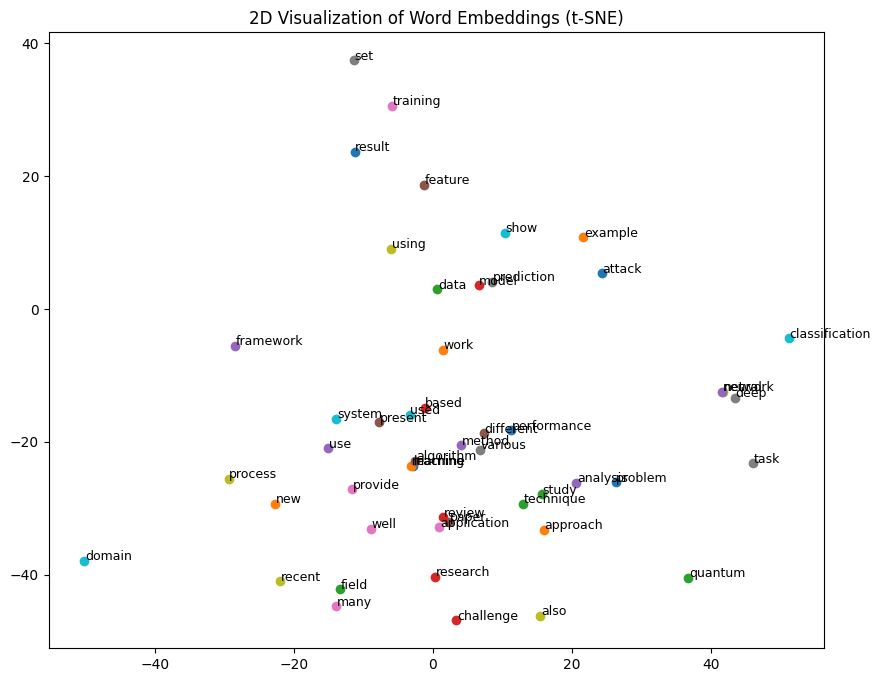


=== Cosine Similarity Results ===
   machine ↔ learning   = 0.6712
    neural ↔ network    = 0.6295
      data ↔ analysis   = 0.1586
     model ↔ performance = 0.1369
  research ↔ paper      = 0.1746


In [2]:
# ============================
# 🚧 SETUP & INSTALLATION
# ============================
!pip install --quiet gensim==4.3.2 scikit-learn==1.2.2 matplotlib==3.7.1 nltk==3.8.1 pandas==2.0.3 numpy==1.24.4

# ============================
# 📦 IMPORT LIBRARIES
# ============================
import nltk, re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from google.colab import drive
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# ============================
# 📂 MOUNT GOOGLE DRIVE
# ============================
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/papers_10000_cleaned.csv"
df = pd.read_csv(file_path)
print(f"✅ Loaded {len(df)} rows from {file_path}")

# 🧹 TEXT PREPROCESSING
# ============================
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)   # 👈 add this line

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)     # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)           # remove punctuation/numbers
    tokens = nltk.word_tokenize(text)
    return [w for w in tokens if len(w) > 2]       # remove very short tokens


# Use your available column (adjust if needed)
text_col = "clean_lemmatized" if "clean_lemmatized" in df.columns else "text"
sentences = df[text_col].dropna().apply(preprocess_text).tolist()

print("✅ Example tokens:", sentences[0][:10])

# ============================
# 🧠 TRAIN WORD2VEC MODEL
# ============================
model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=5,
    min_count=2,
    sg=1,
    epochs=15
)
print("✅ Word2Vec training complete. Vocabulary size:", len(model.wv.index_to_key))

# ============================
# 🎨 VISUALIZATION (PCA + t-SNE)
# ============================
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[w] for w in words])

# PCA → t-SNE
pca = PCA(n_components=min(50, len(words)))
pca_result = pca.fit_transform(word_vectors)

tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(pca_result)-1))
tsne_result = tsne.fit_transform(pca_result)

plt.figure(figsize=(10, 8))
plot_words = words[:50]
plot_vectors = tsne_result[:50]

for i, word in enumerate(plot_words):
    plt.scatter(plot_vectors[i, 0], plot_vectors[i, 1])
    plt.text(plot_vectors[i, 0]+0.1, plot_vectors[i, 1]+0.1, word, fontsize=9)

plt.title("2D Visualization of Word Embeddings (t-SNE)")
plt.show()

# ============================
# 📏 COSINE SIMILARITY (VALID WORD PAIRS)
# ============================
def cosine_sim(w1, w2):
    if w1 in model.wv and w2 in model.wv:
        v1, v2 = model.wv[w1], model.wv[w2]
        return float(cosine_similarity([v1], [v2])[0][0])
    else:
        return None

pairs = [
    ("machine", "learning"),
    ("neural", "network"),
    ("data", "analysis"),
    ("model", "performance"),
    ("research", "paper")
]

print("\n=== Cosine Similarity Results ===")
for w1, w2 in pairs:
    sim = cosine_sim(w1, w2)
    if sim is not None:
        print(f"{w1:>10s} ↔ {w2:<10s} = {sim:.4f}")
    else:
        print(f"{w1:>10s} ↔ {w2:<10s} = ❌ not in vocab")


## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



1. Selected NLP Task:Sentiment Analysis / Text Classification

I choose to perform sentiment analysis for my NLP assignment because the dataset contains reviews of cosmetic items in which consumers express neutral opinions, complaints, or satisfaction.  The best way to train a text classification model that can understand consumer sentiment is to use sentiment analysis, which helps classify these evaluations according to their emotional tone or attitude.

2. Labeling Schema:

Each reviews in our cosmetic item dataset was labeled with one of three sentiment categories:
-Reviews that express satisfaction or gratitude for a product are called positive.e.g "This foundation is long lasting and blends flawlessly."
-Reviews showing dissatisfaction or disappointment are classified as negative. e.g "Using moisturizer made my skin oily and led to breakouts."
-Reviews that are unbiased, factual, and devoid of strong emotions are called neutral. e.g "The product is odorless and comes in a 30 ml bottle.

3. AI assistance was used to pre-label the reviews, and all labels were manually verified for accuracy. This schema ensures that each review can be clearly classified for sentiment analysis or text classification tasks.


The GitHub link of final csv file:
https://github.com/sthapa5496-ops/Samraggi/blob/main/Thapa_Samraggi_Assignment_3(excel).xlsx


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

I think the assignment was okay. It took me like 4-5 hours to do the assignment. The challenging part was using n-gram analysis and calculating probabilties. The aspect that i enjoyed was I learned visualize semantic correlations and develop a word embedding model